# The archive

When you fit a brush estimator, two new attributes are created: `best_estimator_` and `archive_`.

If you set `use_arch` to `True` when instantiating the estimator, then it will store the pareto front as a list in `archive_`. This pareto front is always created with individuals from the final population that are not dominated in objectives **scorer** and **complexity**. Setting `scorer` as an objective means optimizing the metric set as `scorer: str`.

In case you need more flexibility, the archive will contain the entire final population if `use_arch` is `False`, and you can iterate through this list to select individuals with different criteria. It is also good to remind that Brush supports different optimization objectives using the argument `objectives`.

Each element from the archive is a serialized individual (JSON object).

In [1]:
import pandas as pd
from pybrush import BrushClassifier

# load data
df = pd.read_csv('../examples/datasets/d_analcatdata_aids.csv')
X = df.drop(columns='target')
y = df['target']

In [2]:
est = BrushClassifier(
    # functions=['SplitBest','Add','Mul','Sin','Cos','Exp','Logabs'],
    use_arch=True,
    objectives=["scorer", "linear_complexity"],
    scorer='balanced_accuracy', # brush implements several metrics for clf and reg!
    max_gens=100,
    pop_size=100,
    max_depth=10,
    max_size=100,
    verbosity=1
)

est.fit(X,y)

print("Best model:", est.best_estimator_.get_model())
print('score:', est.score(X,y))

Completed 100% [====================]
Best model: Logistic(Sum(-0.66,0.01*Exp(0.69*Sum(3.66*Tan(1.55*Cos(1.20*Log1p(0.80*AIDS))),1.00*Square(0.40*Tan(Sub(AIDS,2.46)))))))
score: 0.84


You can see individuals from archive using the index:

In [3]:
print(len(est.archive_[0]))

est.archive_[0]

7


{'fitness': {'complexity': 128,
  'crowding_dist': 3.4028234663852886e+38,
  'dcounter': 0,
  'depth': 3,
  'dominated': [],
  'linear_complexity': 15,
  'loss': 0.5,
  'loss_v': 0.5,
  'prev_complexity': 128,
  'prev_depth': 3,
  'prev_linear_complexity': 15,
  'prev_loss': 0.5,
  'prev_loss_v': 0.5,
  'prev_size': 5,
  'rank': 1,
  'size': 5,
  'values': [0.5, 15.0],
  'weights': [1.0, -1.0],
  'wvalues': [0.5, -15.0]},
 'id': 276,
 'is_fitted_': False,
 'objectives': ['balanced_accuracy', 'linear_complexity'],
 'parent_id': [241],
 'program': {'Tree': [{'W': 1.0,
    'arg_types': ['ArrayF'],
    'center_op': True,
    'feature': '',
    'feature_type': 'ArrayF',
    'fixed': True,
    'is_weighted': False,
    'name': 'Logistic',
    'node_type': 'Logistic',
    'prob_change': 0.0,
    'ret_type': 'ArrayF',
    'sig_dual_hash': 10617925524997611780,
    'sig_hash': 13326223354425868050},
   {'W': -21.192781448364258,
    'arg_types': ['ArrayF'],
    'center_op': True,
    'feature':

And you can call `predict` (or `predict_proba`, if your `est` is an instance of `BrushClassifier`) with the entire archive:

In [4]:
est.predict_archive(X)


[{'id': 276,
  'y_pred': array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False])},
 {'id': 255,
  'y_pred': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True, False,  True,  True,  True,  True,
         False,  True,  True,  True, False])},
 {'id': 291,
  'y_pred': array([False,  True,  True,  True,  True, False,  True,  True,  True,
          True, False,  True,  True,  True, F

In [5]:
est.predict_proba_archive(X)

[{'id': 276,
  'y_pred': array([1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997556e-09, 1.6997556e-09, 1.6997556e-09, 1.6997556e-09,
         1.6997554e-09, 1.6997554e-09], dtype=float32)},
 {'id': 255,
  'y_pred': array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,


## Loading a specific model from archive

We have a static class method called `from_json` which let's you easily the string representation of the json from the archive to load an individual.

In [6]:
from pybrush import individual

loaded_from_arch = individual.ClassifierIndividual.from_json(est.archive_[-1])

In [7]:
print(loaded_from_arch.get_model())
print(loaded_from_arch.fitness)

Logistic(Sum(-0.66,0.01*Exp(0.69*Sum(3.66*Tan(1.55*Cos(1.20*Log1p(0.80*AIDS))),1.00*Square(0.40*Tan(Sub(AIDS,2.46)))))))
Fitness(0.840000 106.000000 )


To use this loaded model to do predictions, you need to wrap the data into a Dataset:

In [8]:
from pybrush import Dataset

loaded_from_arch.predict(Dataset(X=X, ref_dataset=est.data_, 
                              feature_names=est.feature_names_))

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

## Visualizing the Pareto front of the archive

8


Text(0, 0.5, 'Complexity (smaller is better)')

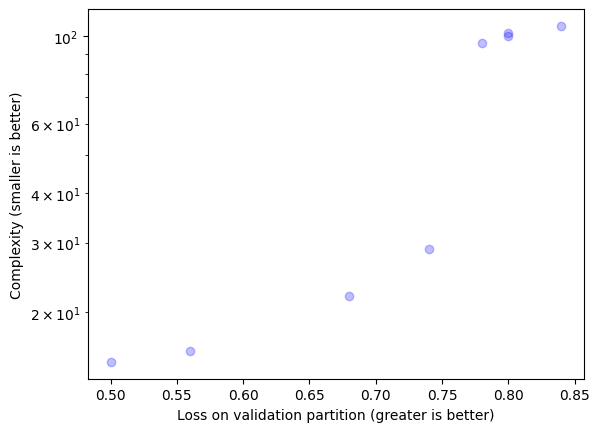

In [9]:
import matplotlib.pyplot as plt

xs, ys = [], []
for ind in est.archive_:
    # We should look at the same objectives to get a valid pareto front
    xs.append(ind['fitness']['loss'])
    ys.append(ind['fitness']['linear_complexity'])

print(len(xs))
plt.scatter(xs, ys, alpha=0.25, c='b', linewidth=1.0)
plt.yscale('log')
plt.xlabel("Loss on validation partition (greater is better)")
plt.ylabel("Complexity (smaller is better)")

## Storing the population (unique individuals)

If not using archive, then the unique individuals from the final population will be stored. Notice that, while the archive contains only the Pareto front (when `use_arch=True`), this will contain all individuals, even dominated ones.

In [10]:
est = BrushClassifier(
    # functions=['SplitBest','Add','Mul','Sin','Cos','Exp','Logabs'],
    use_arch=True,
    objectives=["scorer", "linear_complexity"],
    max_depth=10,
    max_size=100,
    max_gens=100,
    pop_size=200,
    verbosity=1
)

est.fit(X,y)

print("Best model:", est.best_estimator_.get_model())
print('score:', est.score(X,y))

Completed 100% [====================]
Best model: Logistic(Sum(2.90,5.79*Min(Log(Max(If(AIDS>15890.50,Total,0.48),Sin(15888.76*Sin(Sum(15890.50*Total,15890.50))),-0.31)),1.00,15810.96)))
score: 0.8


13


Text(0, 0.5, 'Complexity (smaller is better)')

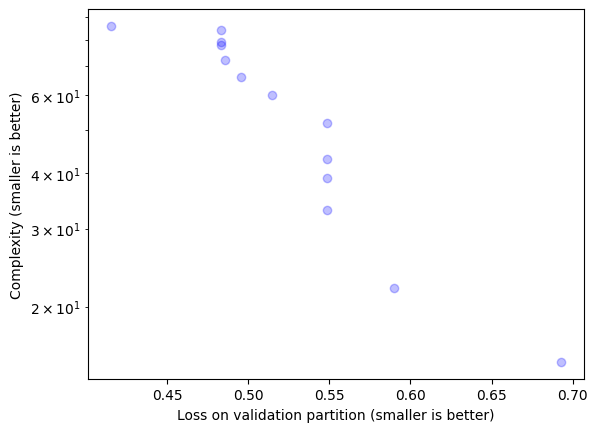

In [11]:
xs, ys = [], []
for ind in est.archive_:
    # use the same as the objectives
    xs.append(ind['fitness']['loss'])
    ys.append(ind['fitness']['linear_complexity'])

print(len(xs))
plt.scatter(xs, ys, alpha=0.25, c='b', linewidth=1.0)
plt.yscale('log')
plt.xlabel("Loss on validation partition (smaller is better)")
plt.ylabel("Complexity (smaller is better)")

# (advanced) Interactive plot of archive

In [12]:
# TODO